<a href="https://colab.research.google.com/github/okazubentou/GeekSalon/blob/main/%E6%A0%AA%E4%BE%A1%E4%BA%88%E6%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
nikkei = web.DataReader("NIKKEI225", "fred", "2019/9/27","2022/9/27")

In [4]:
nikkei

,NIKKEI225
DATE,
2019-09-27,21878.90
2019-09-30,21755.84
2019-10-01,21885.24
2019-10-02,21778.61
2019-10-03,21341.74
...,...
2022-09-21,27313.13
2022-09-22,27153.83
2022-09-23,NaN


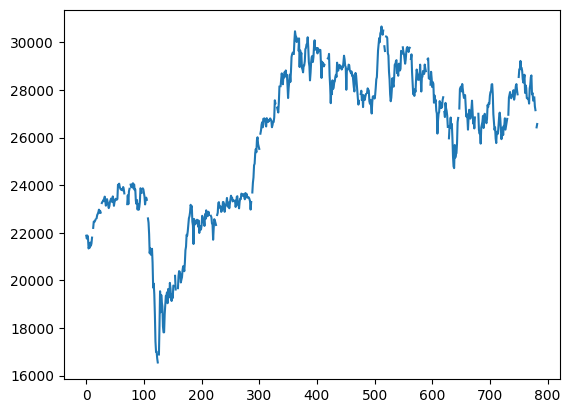

In [5]:
date = range(len(nikkei["NIKKEI225"]))
value = nikkei["NIKKEI225"]
plt.plot(date, value)

In [7]:
nikkei = nikkei.interpolate()

In [8]:
nikkei

,NIKKEI225
DATE,
2019-09-27,21878.90
2019-09-30,21755.84
2019-10-01,21885.24
2019-10-02,21778.61
2019-10-03,21341.74
...,...
2022-09-21,27313.13
2022-09-22,27153.83
2022-09-23,26792.69


In [9]:
data = nikkei.values

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
NikkeiData_norm = scaler.fit_transform(data)

In [11]:
NikkeiData_norm

array([[-1.28340297],
       [-1.32283516],
       [-1.28137144],
       [-1.31553896],
       [-1.45552546],
       [-1.43358878],
       [-1.44478783],
       [-1.37668672],
       [-1.4187913 ],
       [-1.38815813],
       [-1.30904703],
       [-1.24362472],
       [-1.17820241],
       [-1.09306081],
       [-1.09980908],
       [-1.0867291 ],
       [-1.06871449],
       [-1.05646123],
       [-1.04420796],
       [-1.00408365],
       [-0.98831526],
       [-0.96669901],
       [-0.9324578 ],
       [-0.97443741],
       [-0.94754688],
       [-0.97198612],
       [-0.90770454],
       [-0.84342297],
       [-0.82681505],
       [-0.81832364],
       [-0.79860114],
       [-0.81783659],
       [-0.75754117],
       [-0.82167214],
       [-0.87881132],
       [-0.82697527],
       [-0.79062562],
       [-0.83039426],
       [-0.8765619 ],
       [-0.91180605],
       [-0.88799806],
       [-0.83034299],
       [-0.80454513],
       [-0.78389338],
       [-0.7930673 ],
       [-0

In [12]:
maxlen = 10
x_data = []
y_data_price = []
for i in range(len(NikkeiData_norm) - maxlen):
    x_data.append(NikkeiData_norm[i:i + maxlen])
    y_data_price.append(NikkeiData_norm[i + maxlen])

In [13]:
x_data = np.asarray(x_data)
y_data_price = np.asarray(y_data_price)

In [15]:
train_size = int(x_data.shape[0] * 0.8)

In [16]:
x_train = x_data[:train_size]
y_train_price = y_data_price[:train_size]

In [17]:
x_test = x_data[train_size:]
y_test_price = y_data_price[train_size:]

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Activation
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
out_neurons = 1
units = 300
model = Sequential()
model.add(LSTM(units, batch_input_shape=(None, maxlen, 1), return_sequences=False))
model.add(Dense(out_neurons))

In [20]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer , metrics=[metrics.mae])

In [21]:
early_stopping = EarlyStopping(monitor='val_mean_absolute_error', mode='auto', patience=7)

In [22]:
hist = model.fit(x_train, y_train_price,
          batch_size=30,
          epochs=50,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Epoch 1/50
19/19 [==============================] - 4s 66ms/step - loss: 0.1975 - mean_absolute_error: 0.3073 - val_loss: 0.0516 - val_mean_absolute_error: 0.1719
Epoch 2/50
19/19 [==============================] - 1s 39ms/step - loss: 0.0391 - mean_absolute_error: 0.1444 - val_loss: 0.0252 - val_mean_absolute_error: 0.1286
Epoch 3/50
19/19 [==============================] - 1s 38ms/step - loss: 0.0326 - mean_absolute_error: 0.1263 - val_loss: 0.0291 - val_mean_absolute_error: 0.1316
Epoch 4/50
19/19 [==============================] - 1s 55ms/step - loss: 0.0328 - mean_absolute_error: 0.1296 - val_loss: 0.0380 - val_mean_absolute_error: 0.1488
Epoch 5/50
19/19 [==============================] - 1s 62ms/step - loss: 0.0298 - mean_absolute_error: 0.1202 - val_loss: 0.0278 - val_mean_absolute_error: 0.1285
Epoch 6/50
19/19 [==============================] - 1s 59ms/step - loss: 0.0273 - mean_absolute_error: 0.1159 - val_loss: 0.0256 - val_mean_absolute_error: 0.1239
Epoch 7/50
19/19 [====

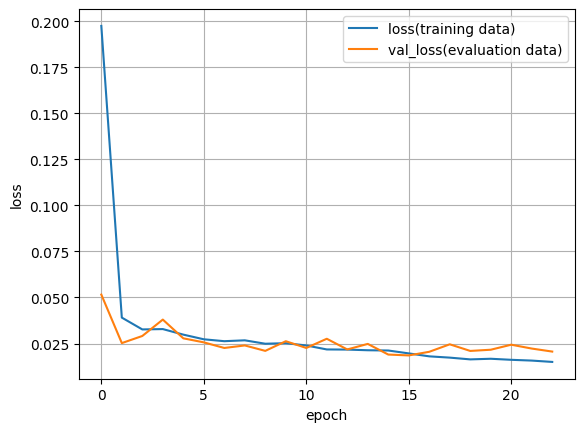

In [23]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, label='loss(training data)')
plt.plot(range(epochs), val_loss, label='val_loss(evaluation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

5/5 [==============================] - 1s 36ms/step


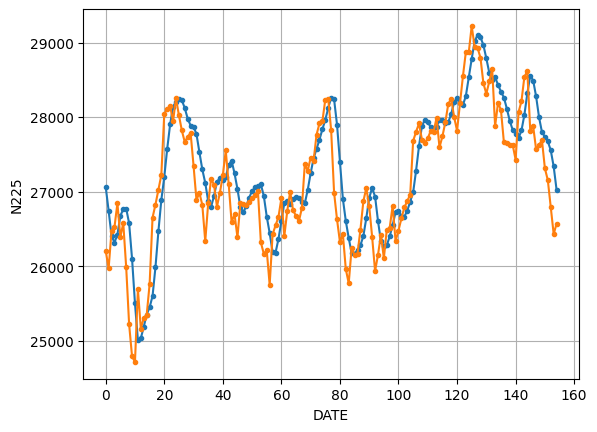

In [24]:
predicted = model.predict(x_test)

predicted_N =    scaler.inverse_transform(predicted)
y_test_price_N = scaler.inverse_transform(y_test_price)

plt.plot(range(len(predicted)), predicted_N, marker='.', label='predicted')
plt.plot(range(len(y_test_price)), y_test_price_N, marker='.', label='y_test_price')
plt.grid()
plt.xlabel('DATE')
plt.ylabel('N225')
plt.show()

In [25]:
from sklearn.metrics import r2_score
r2_score(predicted_N,y_test_price_N)

0.6900713834834735